In [35]:
# import all necessary librairies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

# adjust the configuration of the plots we will create
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12, 8) 

# import data
df = pd.read_csv(r'C:\Users\Kamila\Desktop\projekty\movies_project_python\movies.csv')

In [36]:
# lets´s look at the data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [37]:
# check the number of rows in the original table
df.shape

(7668, 15)

In [38]:
# let´s see if there is any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col, pct_missing))
    
# mean calculates the average value of the mask. True = 1, False = 0. 
# The average of the mask is the ratio of missing values to the total number of values in the column.

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [39]:
# clean rows with NaN values
df=df.dropna()   
# parameter is implicitly set on axis=0, so parentheses can remain empty.

In [40]:
# delete duplicates
df.drop_duplicates()

name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                               The Gods Must Be Crazy         PG  Adventure   
12                                               Popeye         PG  Adventure   
13                                      Ordinary People          R      Drama   
14                                      Dressed to Kill          R      Crime   
15                                    Somewhere in Time         PG      Drama   
17                                               9 to 5         PG     Comedy   
18                                              The Fog          R     Horror   
20                                             Cruising          R      Crime   
21                                        Heaven's Gate          R  Adventure   
22                                  The Final Countdown         PG     Action   
23                                               Xanadu         PG    Fantasy   
28                                             Brubaker          R      Crime   
29                                      American Gigolo          R      Crime   
33                     Cattle Annie and Little Britches         PG      Drama   
35                                     Private Benjamin          R     Comedy   
36                                The Hollywood Knights          R     Comedy   
37                                           Motel Hell          R     Comedy   
42                                        The Stunt Man          R     Action   
46                                           The Island          R     Action   
48                                        The Nude Bomb         PG     Action   
50                                    Stardust Memories         PG     Comedy   
51                                    Melvin and Howard          R     Comedy   
53                                         Bronco Billy         PG     Action   
56                                 When Time Ran Out...         PG     Action   
57                                      Oh Heavenly Dog         PG     Comedy   
58                                          The Octagon          R     Action   
75                        The Last Flight of Noah's Ark          G  Adventure   
77                                        Willie & Phil          R     Comedy   
80                                               Phobia          R      Drama   
92        Indiana Jones and the Raiders of the Lost Ark         PG     Action   
94                       An American Werewolf in London          R     Comedy   
95                                 Escape from New York          R     Action   
96                                        The Evil Dead      NC-17     Horror   
97                                              Porky's          R     Comedy   
98                                             Blow Out          R      Crime   
99                                  Clash of the Titans         PG     Action   
100                                           Excalibur          R  Adventure   
101                                           Mad Max 2          R     Action   
1

In [41]:
# check that rows with zero value have been removed.
df.shape
# yes, zero values were successfully removed because count of rows is not 7668 but only 5421, hooray !

(5421, 15)

In [42]:
# check data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [43]:
# Convert the 'budget' column to data type int64 (update on the left side as well)
df['budget'] = df['budget'].astype('int64')

In [44]:
# convert the 'gross' column to data type int64
df['gross']=df['gross'].astype('int64')   

In [45]:
# convert the 'votes' column to data type int64
df['votes']=df['votes'].astype('int64')

In [46]:
df=df.sort_values(by=['gross'], inplace=False, ascending=False) 

In [47]:
# how to display whole table (but it slows down PC very significantly in case of large dataset)
# pd.set_option('display.max_rows', None)

# back to normal display
pd.set_option('display.max_rows', 60) 

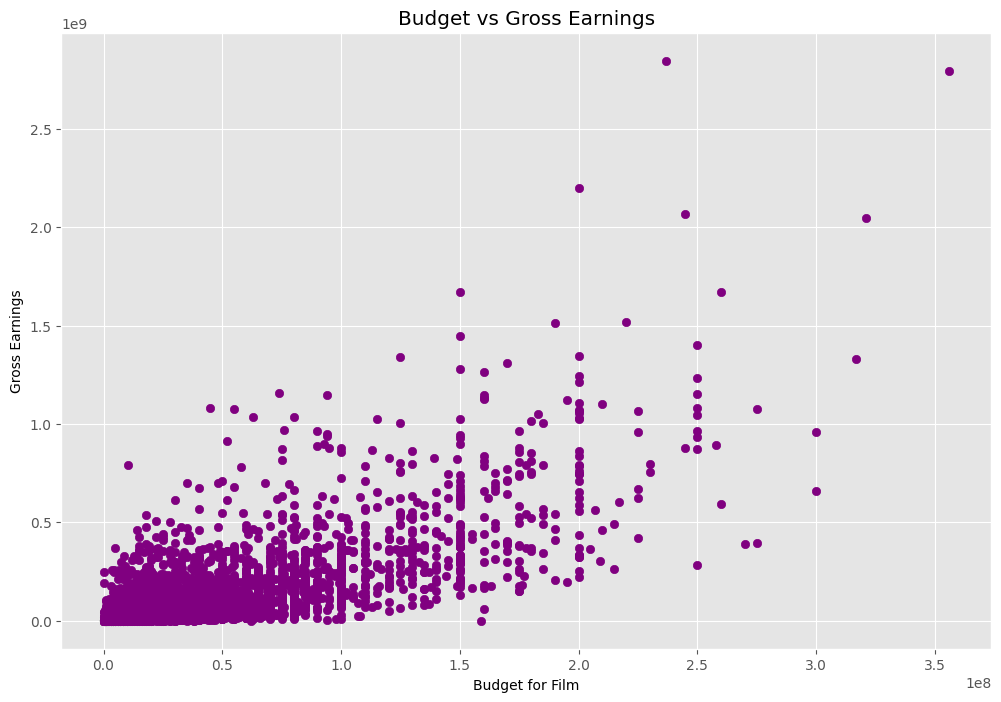

In [48]:
# scatter plot with 'budget' vs 'gross' values
plt.scatter(x=df['budget'],y=df['gross'], c='purple')

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

plt.show()

In [49]:
# check the table
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  
5445  2847246203  Twentieth Century Fox    162.0  
7445  2797501328         Marvel Studios    181.0  
3045  2201647264  Twentieth Century Fox    194.0  
6663  2069521700              Lucasfilm    138.0  
7244  2048359754         Marvel Studios    149.0

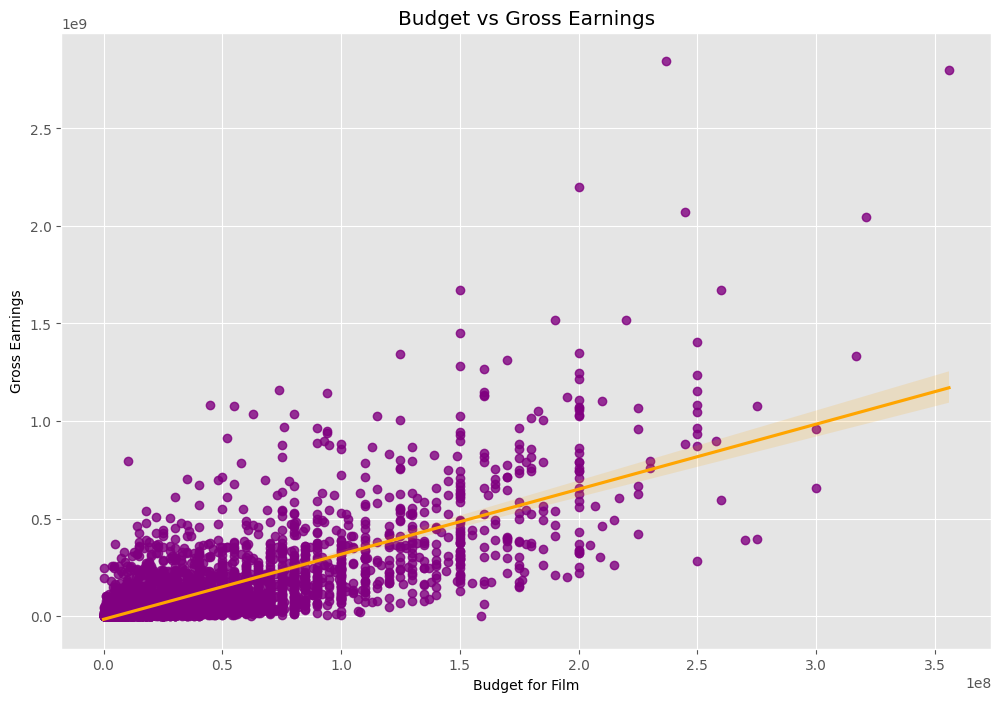

In [50]:
# create a regression plot of 'budget' vs 'gross' using seaborn
sns.regplot(x=df['budget'], y=df['gross'], scatter_kws={'color': 'purple'}, line_kws={'color': 'orange'})
# Another way with the same result => sns.regplot(x='budget', y='gross', data=df)

# set axis labels
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.title('Budget vs Gross Earnings')

# display the plot
plt.show()

In [51]:
# convert the original DataFrame into a DataFrame with numeric values
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()  

# there are 3 types of correlation: 
# Pearson (default) 
# Kendall
# Spearman

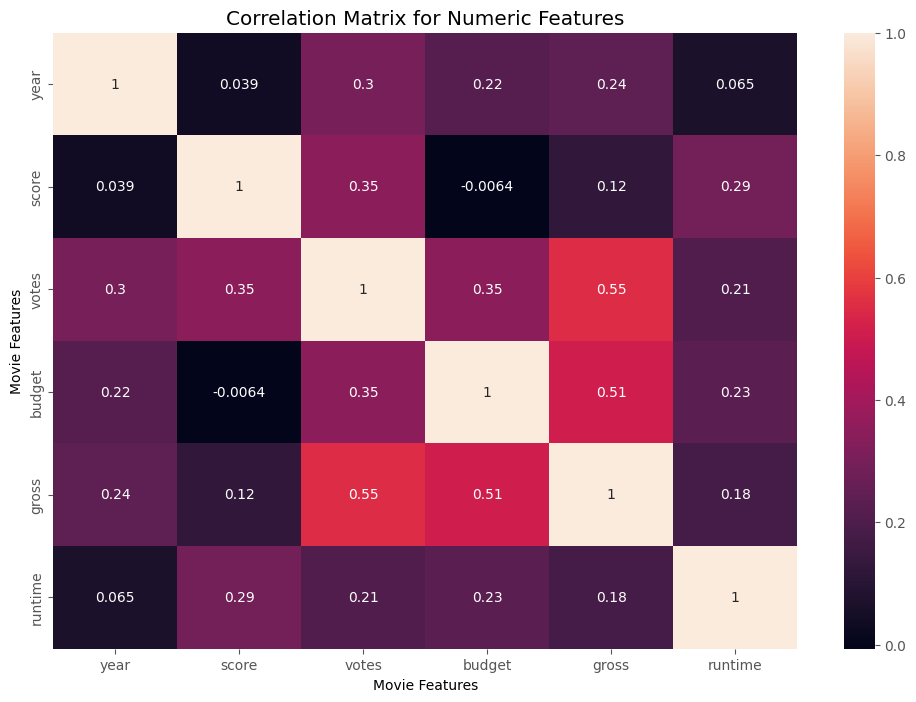

In [52]:
# visualization of Kendall's Correlation Matrix for Numeric Features of Movies
correlation_matrix=numeric_df.corr(method='kendall')
sns.heatmap(correlation_matrix, annot=True)   # annot=True means display values inside boxes
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [53]:
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):     # dtype is used to determine the data type, astype is used to change to another type
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

name  rating  genre  year  released  score    votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000       785    1263   
7445   388       5      0  2019       137    8.4   903000       105     513   
3045  4909       5      6  1997       534    7.8  1100000       785    1263   
6663  3643       5      0  2015       529    7.8   876000       768    1806   
7244   389       5      0  2018       145    8.4   897000       105     513   
...    ...     ...    ...   ...       ...    ...      ...       ...     ...   
5640  3794       6      6  2009       890    5.8     3500       585    2924   
2434  2969       5      0  1993      1467    4.5     1900      1805    3102   
3681  1595       3      6  2000      1721    6.8    43000       952    1683   
272   2909       6      9  1982      1525    3.9     2300       261      55   
3203  4966       5      4  1997      2152    5.7     5800       651     161   

      star  country     budget       gross  company  runtime  
5445  1534       47  237000000  2847246203     1382    162.0  
7445  1470       47  356000000  2797501328      983    181.0  
3045  1073       47  200000000  2201647264     1382    194.0  
6663   356       47  245000000  2069521700      945    138.0  
7244  1470       47  321000000  2048359754      983    149.0  
...    ...      ...        ...         ...      ...      ...  
5640  1498       47    3000000        5073     1385     96.0  
2434   186       47    5000000        2970     1376     97.0  
3681   527        6    5000000        2554      466    108.0  
272   1473       47     800000        2270      582     85.0  
3203  1811       47   15000000         309      504     85.0  

[5421 rows x 15 columns]

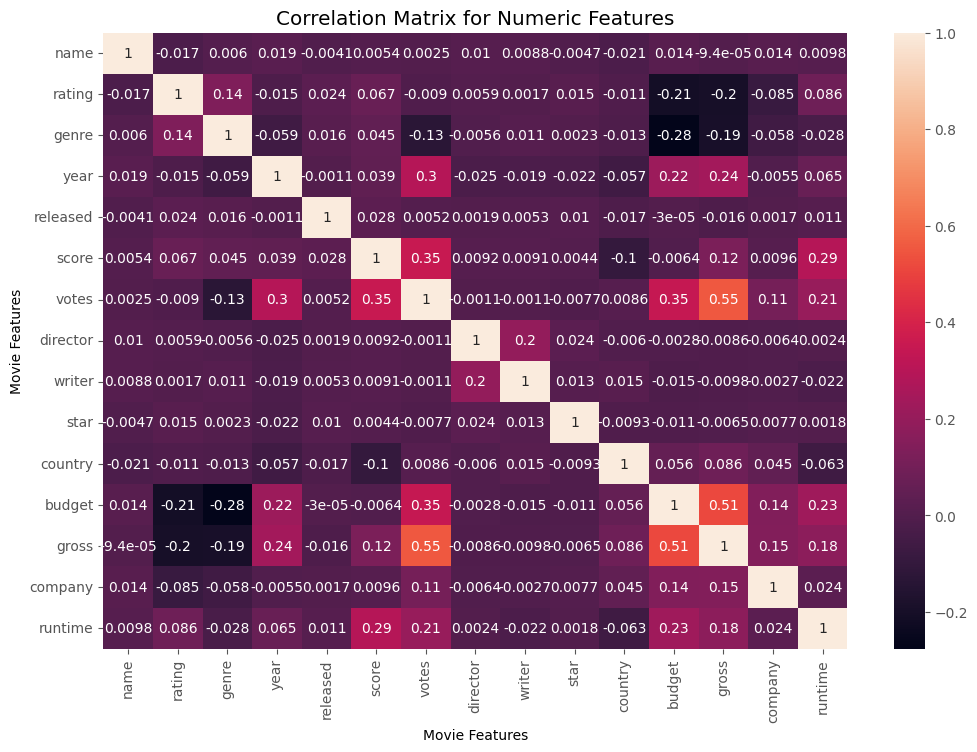

In [54]:
# let´s correlate all columns
correlation_matrix = df_numerized.corr(method='kendall')
sns.heatmap(correlation_matrix, annot=True)   # annot=True means display values inside boxes
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [55]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name      1.000000 -0.029234  0.010996  0.025542 -0.006152  0.014450   
rating   -0.029234  1.000000  0.147796  0.019499  0.018083  0.065983   
genre     0.010996  0.147796  1.000000 -0.073167  0.022142  0.035106   
year      0.025542  0.019499 -0.073167  1.000000 -0.001740  0.056386   
released -0.006152  0.018083  0.022142 -0.001740  1.000000  0.045874   
score     0.014450  0.065983  0.035106  0.056386  0.045874  1.000000   
votes     0.012615  0.006031 -0.135990  0.206021  0.028833  0.474256   
director  0.015246  0.014656 -0.008553 -0.038354  0.002308  0.005413   
writer    0.012880 -0.003149  0.017578 -0.025908  0.008072  0.012843   
star     -0.006882  0.009196  0.003341 -0.032157  0.015706  0.007296   
country  -0.025490  0.008230 -0.009164 -0.066748 -0.017228 -0.043051   
budget    0.023392 -0.203946 -0.368523  0.327722  0.019952  0.072001   
gross     0.005639 -0.181906 -0.244101  0.274321  0.008501  0.222556   
company   0.021697 -0.092357 -0.071334 -0.014333 -0.002407  0.020656   
runtime   0.010850  0.140792 -0.059237  0.075077  0.008975  0.414068   

             votes  director    writer      star   country    budget  \
name      0.012615  0.015246  0.012880 -0.006882 -0.025490  0.023392   
rating    0.006031  0.014656 -0.003149  0.009196  0.008230 -0.203946   
genre    -0.135990 -0.008553  0.017578  0.003341 -0.009164 -0.368523   
year      0.206021 -0.038354 -0.025908 -0.032157 -0.066748  0.327722   
released  0.028833  0.002308  0.008072  0.015706 -0.017228  0.019952   
score     0.474256  0.005413  0.012843  0.007296 -0.043051  0.072001   
votes     1.000000 -0.010376 -0.005316 -0.017638  0.041551  0.439675   
director -0.010376  1.000000  0.261735  0.036593  0.011133 -0.009662   
writer   -0.005316  0.261735  1.000000  0.018520  0.022488 -0.039466   
star     -0.017638  0.036593  0.018520  1.000000 -0.009990 -0.021473   
country   0.041551  0.011133  0.022488 -0.009990  1.000000  0.052977   
budget    0.439675 -0.009662 -0.039466 -0.021473  0.052977  1.000000   
gross     0.614751 -0.029560 -0.035885 -0.000004  0.060078  0.740247   
company   0.118470 -0.008223 -0.003697  0.014082  0.048569  0.170235   
runtime   0.352303  0.017433 -0.017561  0.010108 -0.034477  0.318695   

             gross   company   runtime  
name      0.005639  0.021697  0.010850  
rating   -0.181906 -0.092357  0.140792  
genre    -0.244101 -0.071334 -0.059237  
year      0.274321 -0.014333  0.075077  
released  0.008501 -0.002407  0.008975  
score     0.222556  0.020656  0.414068  
votes     0.614751  0.118470  0.352303  
director -0.029560 -0.008223  0.017433  
writer   -0.035885 -0.003697 -0.017561  
star     -0.000004  0.014082  0.010108  
country   0.060078  0.048569 -0.034477  
budget    0.740247  0.170235  0.318695  
gross     1.000000  0.149553  0.275796  
company   0.149553  1.000000  0.037585  
runtime   0.275796  0.037585  1.000000

In [56]:
# compute and show correlations among all numeric columns in a DataFrame.
# comprehension of relationships between various variables in the data
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
pd.set_option('display.max_rows', None)   # display all rows
corr_pairs

name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.025542
          released   -0.006152
          score       0.014450
          votes       0.012615
          director    0.015246
          writer      0.012880
          star       -0.006882
          country    -0.025490
          budget      0.023392
          gross       0.005639
          company     0.021697
          runtime     0.010850
rating    name       -0.029234
          rating      1.000000
          genre       0.147796
          year        0.019499
          released    0.018083
          score       0.065983
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.181906
          company    -0.092357
          runtime     0.140792
genre     name        0.010996
          rating      0.147796
        

In [57]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head(50)

budget    genre      -0.368523
genre     budget     -0.368523
          gross      -0.244101
gross     genre      -0.244101
budget    rating     -0.203946
rating    budget     -0.203946
          gross      -0.181906
gross     rating     -0.181906
genre     votes      -0.135990
votes     genre      -0.135990
company   rating     -0.092357
rating    company    -0.092357
genre     year       -0.073167
year      genre      -0.073167
genre     company    -0.071334
company   genre      -0.071334
year      country    -0.066748
country   year       -0.066748
genre     runtime    -0.059237
runtime   genre      -0.059237
country   score      -0.043051
score     country    -0.043051
budget    writer     -0.039466
writer    budget     -0.039466
director  year       -0.038354
year      director   -0.038354
writer    gross      -0.035885
gross     writer     -0.035885
country   runtime    -0.034477
runtime   country    -0.034477
star      year       -0.032157
year      star       -0.032157
director

In [58]:
# filter and display only those pairs with a high correlation relationship (greater than 0.5]
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr
# result = votes and budget have the highest correlation to gross earnings

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [59]:
# RESULT OF THE CORRELATION ANALYSIS
# Gross and Votes: There is a significant positive correlation (0.614751) between the number of votes and total gross. 
# This suggests that movies with a higher number of votes may also tend to achieve higher overall revenues.

# Gross and Budget: Additionally, there is a strong positive correlation (0.740247) between total gross and the budget of a film. 
# This means that movies with a higher budget tend to generate higher overall revenues.